In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

from utils import Tetiva, minkowski_sum

In [2]:
# generovanie vzorky 100 000 realizacii tejto nahodnej mnoziny
tetivy = [Tetiva() for _ in range(100_000)]
tetivy_fixed = [Tetiva(True) for _ in range(100_000)]

In [3]:
# vypocet (empirickej) Aumannovej strednej hodnoty
aumann_nonfix = minkowski_sum(polygons=[t.points for t in tetivy])
aumann_fixed = minkowski_sum(polygons=[t.points for t in tetivy_fixed])

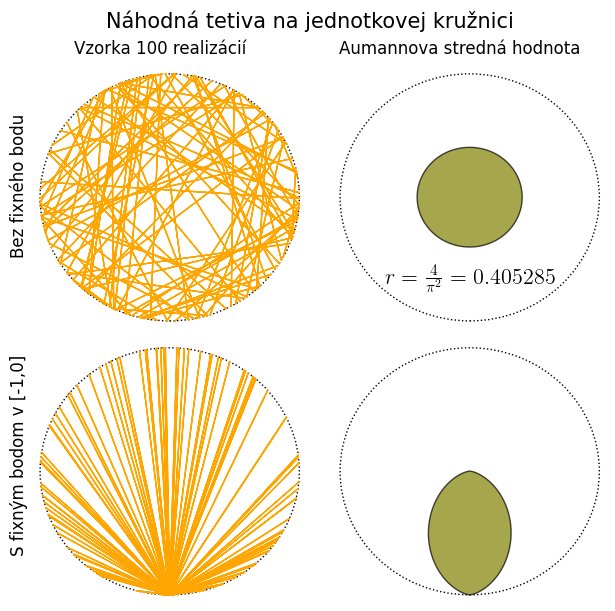

In [4]:
# vystup - ukazka realizacii a Aumannove stredne hodnoty 
fig, ax = plt.subplots(2,2, figsize=(6,6), constrained_layout=True)
fig.suptitle("Náhodná tetiva na jednotkovej kružnici", fontsize=15)
for t1,t2 in zip(tetivy[:100], tetivy_fixed[:100]):
    ax[0,0].plot(t1.points[:,0],t1.points[:,1], lw=1, c="orange")
    ax[1,0].plot(t2.points[:,0],t2.points[:,1], lw=1, c="orange")

ax[0,0].set_title("Vzorka 100 realizácií", fontsize=12)
ax[0,1].set_title("Aumannova stredná hodnota", fontsize=12)
ax[0,1].text(0,-0.7,"$r={4\over\pi^2}=0.405285$", ha="center", usetex=True, fontsize=16)
fig.text(0,0.7,"Bez fixného bodu", va="center", rotation=90, fontsize=12)
fig.text(0,0.25,"S fixným bodom v [-1,0]", va="center", rotation=90, fontsize=12)

plt.setp(ax, xlim=(-1.2, 1.05), ylim=(-1.05, 1.1))

for a in np.ravel(ax):
    a.add_patch(ptch.Circle([0,0],1, ec="black", fill=False, ls=":"))
    a.axis("off")

ax[0,1].add_patch(ptch.Polygon(aumann_nonfix, ec="black", fc="olive", alpha=0.7))
ax[1,1].add_patch(ptch.Polygon(aumann_fixed, ec="black", fc="olive", alpha=0.7))

plt.show()